In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
raw_data = pd.read_csv("Fulani Herdsmen Data/vanguard-Table 1.csv")
raw_data.head()

,YEAR,PAPER,DATE OF REPORT,DATE OF INCIDENT,LOCATION,HEADLINE,LINK
0,NaN,NaN,28-Nov-19,28-Nov-19,"Bani, Fulani camp, Kaiama Local Government Are...",Court remands drunk Fulani herdsman for allege...,https://www.vanguardngr.com/2019/11/court-rema...
1,NaN,NaN,"NOVEMBER 27, 2019",NaN,NaN,Imo communities now rely on God after quit not...,https://www.vanguardngr.com/2019/11/imo-commun...
2,NaN,NaN,"NOVEMBER 18, 2019",NaN,NaN,Imo Govt. disowns group over ultimatum to herd...,https://www.vanguardngr.com/2019/11/imo-govt-d...
3,NaN,NaN,"NOVEMBER 18, 2019",NaN,NaN,"Herdsmen in Imo, gets 24 hours to leave",https://www.vanguardngr.com/2019/11/herdsmen-i...
4,NaN,NaN,"OCTOBER 27, 2019",NaN,NaN,Fulani Socio-cultural organization apologises ...,https://www.vanguardngr.com/2019/10/fulani-soc...


In [4]:
raw_data.columns, raw_data.shape

(Index(['YEAR', 'PAPER', 'DATE OF REPORT', 'DATE OF INCIDENT', 'LOCATION',
        'HEADLINE', 'LINK'],
       dtype='object'),
 (746, 7))

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              0 non-null      float64
 1   PAPER             0 non-null      float64
 2   DATE OF REPORT    744 non-null    object 
 3   DATE OF INCIDENT  219 non-null    object 
 4   LOCATION          293 non-null    object 
 5   HEADLINE          744 non-null    object 
 6   LINK              615 non-null    object 
dtypes: float64(2), object(5)
memory usage: 40.9+ KB


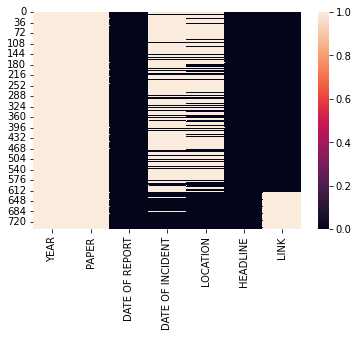

In [6]:
sns.heatmap(raw_data.isnull())
plt.show()

In [7]:
raw_data.dtypes

YEAR                float64
PAPER               float64
DATE OF REPORT       object
DATE OF INCIDENT     object
LOCATION             object
HEADLINE             object
LINK                 object
dtype: object

In [8]:
def valid_datetime_string(string):
    if string == "":
        return False
    try:
        pd.Timestamp(string)
    except:
        return False
    
    return True

def validate_headlines(string):
    # remove non-strings
    if not isinstance(string, str):
        return False
    
    # remove strings that are links
    if 'http' in string:
        return False
    
    return True

In [9]:
clean = raw_data[raw_data['DATE OF REPORT'].map(valid_datetime_string)]
clean = raw_data[raw_data['HEADLINE'].map(validate_headlines)]
clean.shape

(615, 7)

In [10]:
clean['DATE OF REPORT'] = pd.to_datetime(clean['DATE OF REPORT'])
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 618
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              0 non-null      float64       
 1   PAPER             0 non-null      float64       
 2   DATE OF REPORT    615 non-null    datetime64[ns]
 3   DATE OF INCIDENT  109 non-null    object        
 4   LOCATION          164 non-null    object        
 5   HEADLINE          615 non-null    object        
 6   LINK              615 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 38.4+ KB


/var/folders/j0/tm8cdfh92s1gygqzq23h32sc0000gn/T/ipykernel_13399/767432500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['DATE OF REPORT'] = pd.to_datetime(clean['DATE OF REPORT'])


In [11]:
labels = ["YEAR", "PAPER", "DATE OF INCIDENT", "LOCATION"]
clean.drop(labels=labels, axis=1, inplace=True)
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 618
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE OF REPORT  615 non-null    datetime64[ns]
 1   HEADLINE        615 non-null    object        
 2   LINK            615 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 19.2+ KB


/var/folders/j0/tm8cdfh92s1gygqzq23h32sc0000gn/T/ipykernel_13399/3177092374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.drop(labels=labels, axis=1, inplace=True)


In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()

results = [sia.polarity_scores(line) for line in clean.HEADLINE]

scores_df = pd.DataFrame.from_records(results)
df = scores_df.join(clean, rsuffix="_right")
df['ID'] = df.index
df.head()

,neg,neu,pos,compound,DATE OF REPORT,HEADLINE,LINK,ID
0,0.405,0.595,0.000,-0.7783,2019-11-28,Court remands drunk Fulani herdsman for allege...,https://www.vanguardngr.com/2019/11/court-rema...,0
1,0.000,0.826,0.174,0.2732,2019-11-27,Imo communities now rely on God after quit not...,https://www.vanguardngr.com/2019/11/imo-commun...,1
2,0.000,1.000,0.000,0.0000,2019-11-18,Imo Govt. disowns group over ultimatum to herd...,https://www.vanguardngr.com/2019/11/imo-govt-d...,2
3,0.146,0.854,0.000,-0.0516,2019-11-18,"Herdsmen in Imo, gets 24 hours to leave",https://www.vanguardngr.com/2019/11/herdsmen-i...,3
4,0.248,0.598,0.154,-0.2732,2019-10-27,Fulani Socio-cultural organization apologises ...,https://www.vanguardngr.com/2019/10/fulani-soc...,4


In [13]:
negative = df.iloc[df.neg.idxmax()]
neutral = df.iloc[df.neu.idxmax()]
positive = df.iloc[df.pos.idxmax()]

print(f'Most negative: ({negative.HEADLINE}) {negative.neg}, {negative.neu}, {negative.pos}')
print(f'Most neutral: ({neutral.HEADLINE}) {neutral.neg}, {neutral.neu}, {neutral.pos}')
print(f'Most positive: ({positive.HEADLINE}) {positive.neg}, {positive.neu}, {positive.pos}')

Most negative: (Buhari helpless over herdsmen attacks – Akande) 0.787, 0.213, 0.0
Most neutral: (Imo Govt. disowns group over ultimatum to herdsmen) 0.0, 1.0, 0.0
Most positive: (Herdsmen killings could cost APC dearly in 2019 — Osagie) 0.0, 0.455, 0.545


In [14]:
import altair as alt

df["compound_trunc"] = df.compound.round(1) 

res = (df.groupby(["compound_trunc"])["ID"]
        .count()
        .reset_index()
        .rename(columns={"ID": "count"})
      )

hist = alt.Chart(res).mark_bar(width=15).encode(
    alt.X("compound_trunc:Q", axis=alt.Axis(title="Polarity Score")),
    y=alt.Y('count:Q', axis=alt.Axis(title="Number of headlines")),
    color=alt.Color('compound_trunc:Q', scale=alt.Scale(scheme='redyellowgreen')), 
    tooltip=['compound_trunc', 'count']
).properties(
    title="Polarity scores of Vanguard Newspaper Herdsmen Headlines (2017-2019)"
)

hist

alt.Chart(...)

In [16]:
scatter = alt.Chart(df.sample(n=615, random_state=1)).mark_point().encode(
    alt.X("DATE OF REPORT", axis=alt.Axis(title="Date")),
    y=alt.Y('compound', axis=alt.Axis(title="Polarity Score")),
    color=alt.Color('compound:Q', scale=alt.Scale(scheme='redyellowgreen')), 
    tooltip=['HEADLINE','compound:Q', 'DATE OF REPORT', 'LINK']
).properties(
    title="Polarity scores of Vanguard Newspaper Herdsmen Headlines (2017-2019)"
)

scatter

alt.Chart(...)